<a href="https://colab.research.google.com/github/croliveirads/Challenge-Alura---Data-Science-2/blob/main/Desafio_ETL_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url_data = requests.get('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json')
resultado = json.loads(url_data.text)

In [ ]:
df = pd.json_normalize(resultado, sep='_')

In [ ]:
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

Identificando inconssistencias nos dados


In [ ]:
# Lista de valores que você considera como "ausentes"
missing_values = ['', ' ', '  ', '   ', 'None', 'none', 'NA', 'na', 'NaN']

# Cria uma máscara booleana onde há valores considerados ausentes
missing_mask = df.applymap(lambda x: pd.isnull(x) or str(x).strip() in missing_values)

# Conta o total de "ausentes" por coluna
missing_counts = missing_mask.sum()

# Exibe o resultado
print(missing_counts[missing_counts > 0])

<ipython-input-6-6a76d7788e92>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  missing_mask = df.applymap(lambda x: pd.isnull(x) or str(x).strip() in missing_values)


Churn                    224
account_Charges_Total     11
dtype: int64


Tratamento dos dados encontrados como vazios - Colunas: Churn e account_Charges_Total

In [ ]:
#Utilizando query para identificar os dados vazios coluna Churn
df.query('Churn == ""')

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


In [ ]:
#Exibir os indices de cada linha com registro zero na coluna Churn
df.query('Churn == ""').index

Index([  30,   75,   96,   98,  175,  219,  312,  351,  368,  374,
       ...
       7058, 7061, 7062, 7143, 7155, 7158, 7180, 7211, 7239, 7247],
      dtype='int64', length=224)

In [ ]:
#Armazenando os indices na variavel
registros_vazios_coluna_churn = df.query('Churn == ""').index

In [ ]:
#Removendo linhas com valores vazios
df.drop(registros_vazios_coluna_churn, axis=0, inplace=True)

In [ ]:
#Utilizando query para identificar os dados vazios coluna account_Charges_Total
df.query('account_Charges_Total == " "')

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [ ]:
df.query('account_Charges_Total == " "').index

Index([975, 1775, 1955, 2075, 2232, 2308, 2930, 3134, 3203, 4169, 5599], dtype='int64')

In [ ]:
registros_vazios_coluna_account_Charges_total = df.query('account_Charges_Total == " "').index

In [ ]:
df.drop(registros_vazios_coluna_account_Charges_total, axis=0, inplace=True)

In [ ]:
df.query('account_Charges_Total == " "')

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total


In [ ]:
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer_gender            7032 non-null   object 
 3   customer_SeniorCitizen     7032 non-null   int64  
 4   customer_Partner           7032 non-null   object 
 5   customer_Dependents        7032 non-null   object 
 6   customer_tenure            7032 non-null   int64  
 7   phone_PhoneService         7032 non-null   object 
 8   phone_MultipleLines        7032 non-null   object 
 9   internet_InternetService   7032 non-null   object 
 10  internet_OnlineSecurity    7032 non-null   object 
 11  internet_OnlineBackup      7032 non-null   object 
 12  internet_DeviceProtection  7032 non-null   object 
 13  internet_TechSupport       7032 non-null   object 
 1

In [ ]:
#Criar a coluna com gastos diarios
df['account_Charges_Daily'] = df['account_Charges_Total'] / 30

#<font color='orange'>Análise descritiva

In [ ]:
df.describe()

,customer_SeniorCitizen,customer_tenure,account_Charges_Monthly,account_Charges_Total,account_Charges_Daily
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,76.110015
std,0.368844,24.545260,30.085974,2266.771362,75.559045
min,0.000000,1.000000,18.250000,18.800000,0.626667
25%,0.000000,9.000000,35.587500,401.450000,13.381667
50%,0.000000,29.000000,70.350000,1397.475000,46.582500
75%,0.000000,55.000000,89.862500,3794.737500,126.491250
max,1.000000,72.000000,118.750000,8684.800000,289.493333


##<font color='orange'>Distribuição da Evasão

In [ ]:
evasao = df['Churn'].value_counts()
evasao

,count
Churn,
No,5163
Yes,1869


In [ ]:
soma = evasao.sum()
soma

np.int64(7032)

In [ ]:
proporção_evasao = evasao / soma * 100
proporção_evasao.round(2)

,count
Churn,
No,73.42
Yes,26.58


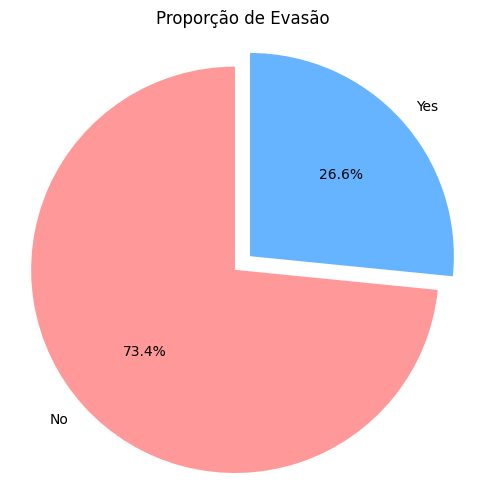

In [ ]:
label_churn = ['No', 'Yes']
plt.figure(figsize=(6,6))
explode = (0.1, 0)
plt.pie(proporção_evasao, labels=label_churn, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'], explode=explode)
plt.axis('equal')
plt.title('Proporção de Evasão')
plt.show()



##<font color='orange'>

##<font color='orange'>Contagem de Evasão por Variáveis Categóricas

Distribuição de Churn por account_PaymentMethod
       account_PaymentMethod Churn  proportion
0  Bank transfer (automatic)    No       83.27
1  Bank transfer (automatic)   Yes       16.73
2    Credit card (automatic)    No       84.75
3    Credit card (automatic)   Yes       15.25
4           Electronic check    No       54.71
5           Electronic check   Yes       45.29
6               Mailed check    No       80.80
7               Mailed check   Yes       19.20

➡️ Categoria com MAIOR Churn: 'Electronic check' com 45.29%
➡️ Categoria com MENOR Churn: 'Credit card (automatic)' com 15.25%



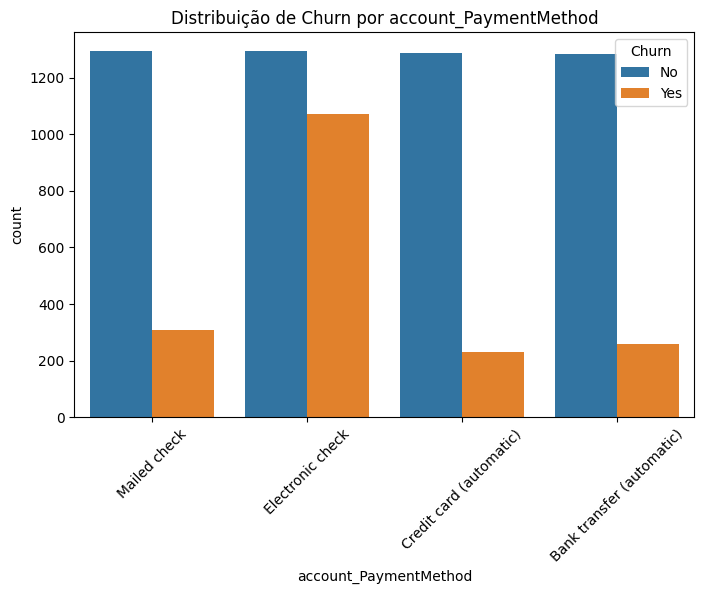

Distribuição de Churn por customer_gender
  customer_gender Churn  proportion
0          Female    No       73.04
1          Female   Yes       26.96
2            Male    No       73.80
3            Male   Yes       26.20

➡️ Categoria com MAIOR Churn: 'Female' com 26.96%
➡️ Categoria com MENOR Churn: 'Male' com 26.2%



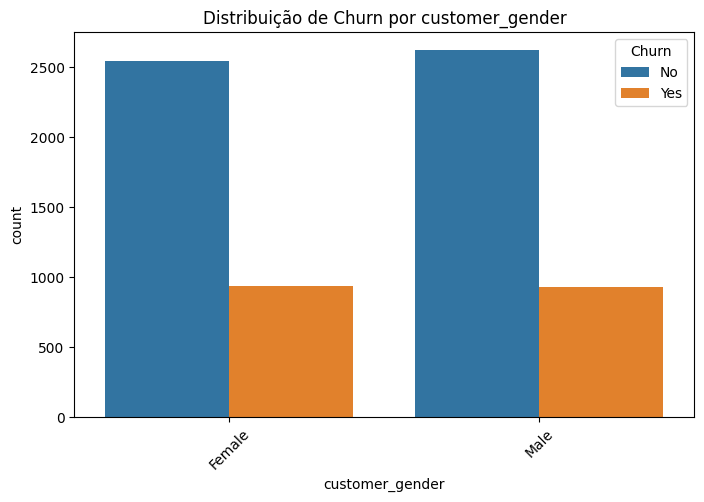

Distribuição de Churn por account_Contract
  account_Contract Churn  proportion
0   Month-to-month    No       57.29
1   Month-to-month   Yes       42.71
2         One year    No       88.72
3         One year   Yes       11.28
4         Two year    No       97.15
5         Two year   Yes        2.85

➡️ Categoria com MAIOR Churn: 'Month-to-month' com 42.71%
➡️ Categoria com MENOR Churn: 'Two year' com 2.85%



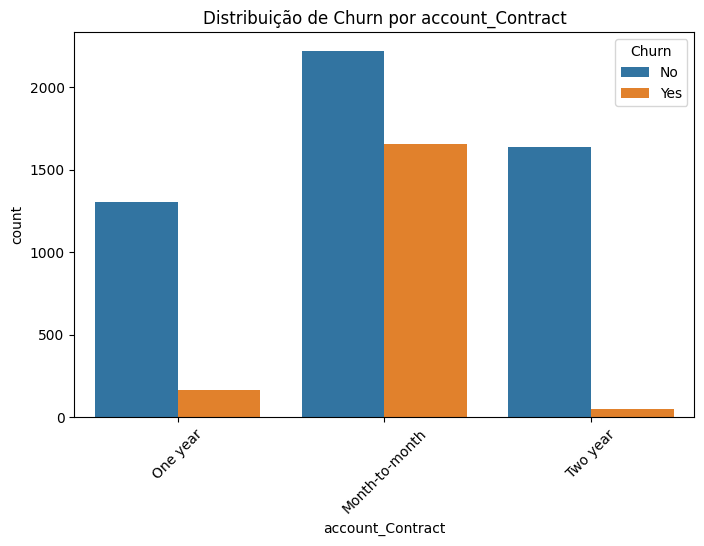


✅ TABELA FINAL COMPARATIVA:

                Variável Categoria com maior Churn  % Churn (maior)  \
0  account_PaymentMethod          Electronic check            45.29   
2       account_Contract            Month-to-month            42.71   
1        customer_gender                    Female            26.96   

  Categoria com menor Churn  % Churn (menor)  
0   Credit card (automatic)            15.25  
2                  Two year             2.85  
1                      Male            26.20  


In [ ]:
categorias_var = ['account_PaymentMethod', 'customer_gender', 'account_Contract']

summary = []

for var in categorias_var:
  print(f'Distribuição de Churn por {var}')
  dist = df.groupby(var)['Churn'].value_counts(normalize=True).rename('proportion').reset_index()
  dist['proportion'] = (dist['proportion'] * 100).round(2)  # Convertendo para %
  print(dist)

  # Filtra só Churn = "Yes"
  churn_yes = dist[dist['Churn'] == 'Yes']

    # Identifica categoria com maior e menor churn
  max_idx = churn_yes['proportion'].idxmax()
  min_idx = churn_yes['proportion'].idxmin()

  max_cat = churn_yes.loc[max_idx]
  min_cat = churn_yes.loc[min_idx]

  print(f"\n➡️ Categoria com MAIOR Churn: '{max_cat[var]}' com {max_cat['proportion']}%")
  print(f"➡️ Categoria com MENOR Churn: '{min_cat[var]}' com {min_cat['proportion']}%\n")

    # Gráfico de barras
  plt.figure(figsize=(8,5))
  sns.countplot(data=df, x=var, hue='Churn')
  plt.title(f'Distribuição de Churn por {var}')
  plt.xticks(rotation=45)
  plt.show()

    # Adiciona os resultados à tabela final
  summary.append({
        'Variável': var,
        'Categoria com maior Churn': max_cat[var],
        '% Churn (maior)': max_cat['proportion'],
        'Categoria com menor Churn': min_cat[var],
        '% Churn (menor)': min_cat['proportion']
    })

# Cria a tabela final
summary_df = pd.DataFrame(summary)
summary_df = summary_df.sort_values(by='% Churn (maior)', ascending=False)

print('\n✅ TABELA FINAL COMPARATIVA:\n')
print(summary_df)





##<font color='orange'>Contagem de Evasão por Variáveis Numéricas



==== account_Charges_Total ====
Churn - Yes:
count    1869.000000
mean     1531.796094
std      1890.822994
min        18.850000
25%       134.500000
50%       703.550000
75%      2331.300000
max      8684.800000
Name: account_Charges_Total, dtype: float64
Churn - No:
count    5163.000000
mean     2555.344141
std      2329.456984
min        18.800000
25%       577.825000
50%      1683.600000
75%      4264.125000
max      8672.450000
Name: account_Charges_Total, dtype: float64


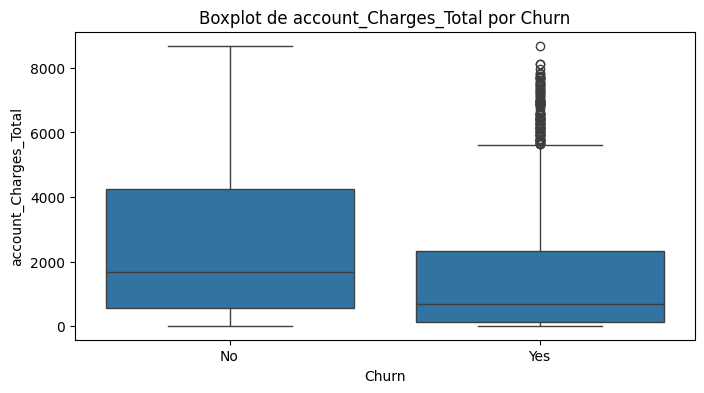

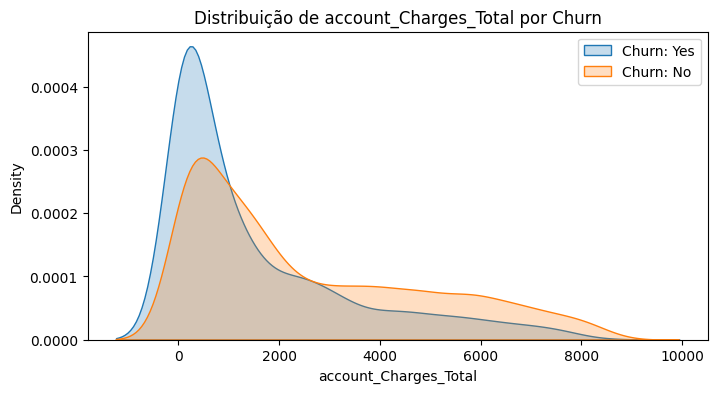


==== account_Charges_Monthly ====
Churn - Yes:
count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: account_Charges_Monthly, dtype: float64
Churn - No:
count    5163.000000
mean       61.307408
std        31.094557
min        18.250000
25%        25.100000
50%        64.450000
75%        88.475000
max       118.750000
Name: account_Charges_Monthly, dtype: float64


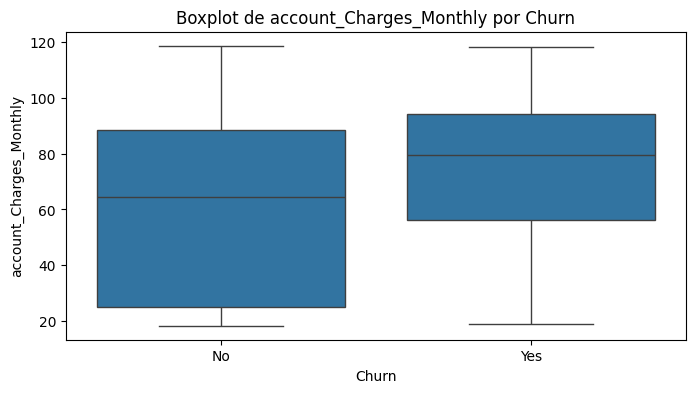

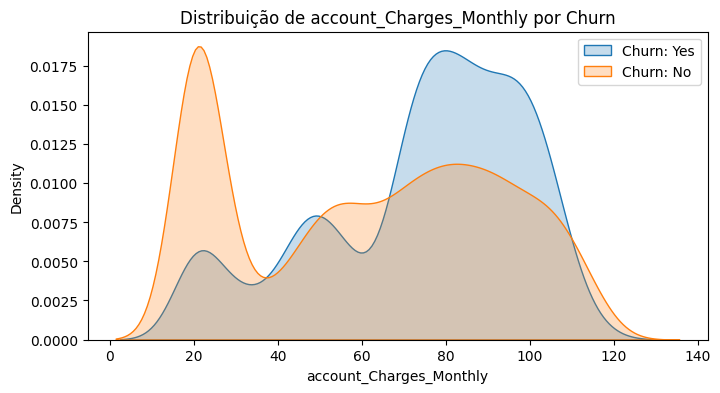


==== customer_tenure ====
Churn - Yes:
count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: customer_tenure, dtype: float64
Churn - No:
count    5163.00000
mean       37.65001
std        24.07694
min         1.00000
25%        15.00000
50%        38.00000
75%        61.00000
max        72.00000
Name: customer_tenure, dtype: float64


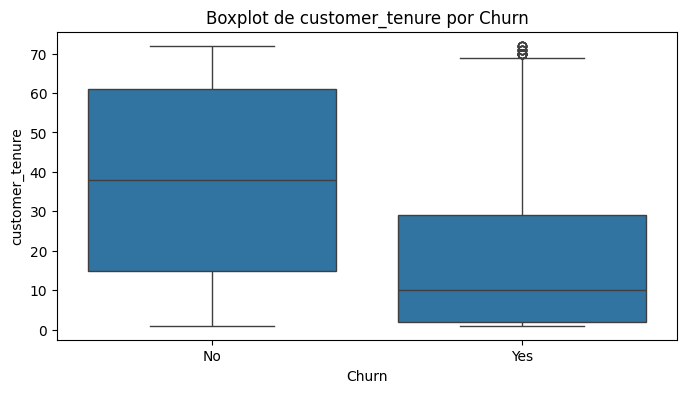

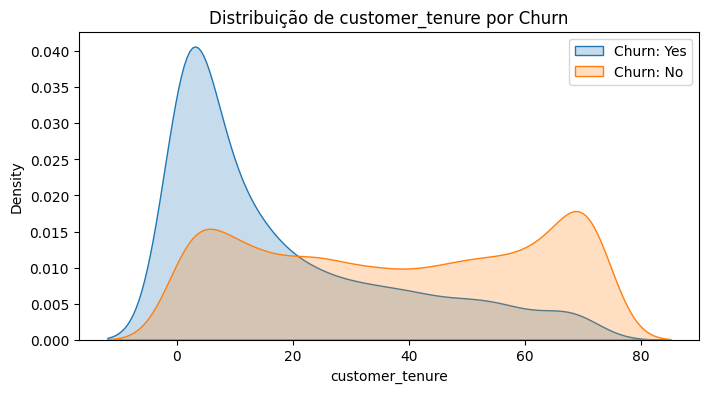

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Separar por churn
churn_yes = df[df['Churn'] == 'Yes']
churn_no = df[df['Churn'] == 'No']

# Variáveis numéricas
num_vars = ['account_Charges_Total', 'account_Charges_Monthly', 'customer_tenure']

# Estatísticas descritivas
for var in num_vars:
    print(f'\n==== {var} ====')
    print('Churn - Yes:')
    print(churn_yes[var].describe())
    print('Churn - No:')
    print(churn_no[var].describe())



    # Boxplot
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Churn', y=var, data=df)
    plt.title(f'Boxplot de {var} por Churn')
    plt.show()

    # Densidade
    plt.figure(figsize=(8,4))
    sns.kdeplot(churn_yes[var], label='Churn: Yes', fill=True)
    sns.kdeplot(churn_no[var], label='Churn: No', fill=True)
    plt.title(f'Distribuição de {var} por Churn')
    plt.legend()
    plt.show()


##Relatório

#Introdução

Objetivo da análise: Foram coletados dados dad empresa XTelecon onde foi solicitado que pudesse entender melhor o problema de tantos cancelamentos ao longo do tempo.Apos os dados coletados viu-se que cerca de 26% dos clientes fizeram um cancelemento,ou seja, um numero elevado dado a quantidade de clientes da XTelecon levando assim  a empresa identificar os problemas através dos insigths gerados pelas analises de dados e criar planos de ação para reduzir os cancelamentos.

##Limpeza e Tratamento de Dados

Inicialmente foram coletados os dados e feito a importação para analise e tratamento dos dados. Foi possivel indentificar que a base de dados tinha algumas colunas com valores vazios(strings). Foi aplicado um algoritimo para indenticar as colunas com esses problemas e remover esses dados para que os mesmos não interferisem nas analises de dados. Houve necessidade tambem de alterar o tipo de dado para a colunas do tipo float(account Total), pois elas estavam como strings.

##Análise Exploratória de Dados:

Apos efetuar o tratamento dos dados foi possivel identificar alguns numeros a a amplitude dos dados para poder entender melhor o motivo do churn.

In [ ]:
df.describe()

,customer_SeniorCitizen,customer_tenure,account_Charges_Monthly,account_Charges_Total,account_Charges_Daily
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,76.110015
std,0.368844,24.545260,30.085974,2266.771362,75.559045
min,0.000000,1.000000,18.250000,18.800000,0.626667
25%,0.000000,9.000000,35.587500,401.450000,13.381667
50%,0.000000,29.000000,70.350000,1397.475000,46.582500
75%,0.000000,55.000000,89.862500,3794.737500,126.491250
max,1.000000,72.000000,118.750000,8684.800000,289.493333


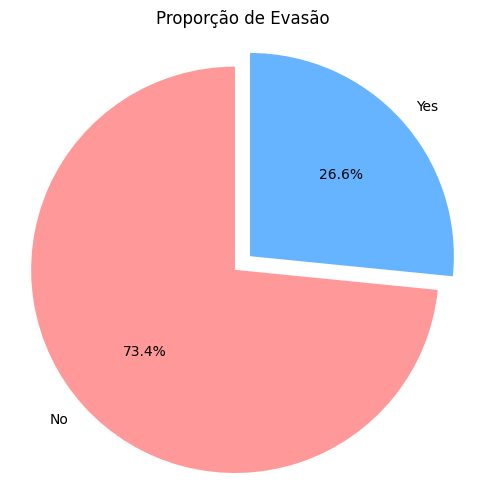

In [ ]:
label_churn = ['No', 'Yes']
plt.figure(figsize=(6,6))
explode = (0.1, 0)
plt.pie(proporção_evasao, labels=label_churn, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'], explode=explode)
plt.axis('equal')
plt.title('Proporção de Evasão')
plt.show()

✅ 1. Tamanho das amostras:

*   Churn = Yes → 1.869 clientes.
*   Churn = No → 5.163 clientes.

Ou seja, a maioria não cancelou. Isso é comum e importante para interpretar a análise.

✅ 2. Média do tempo de contrato (customer_tenure):

*   Quem cancelou: ~ 18 meses.
*   Quem ficou: ~ 38 meses.

➡️ Clientes que não cancelam tendem a ter contratos mais longos.

➡️ Clientes que cancelam geralmente saem antes de completar 2 anos.

✅ 4. Quartis:<br>
    Churn = Yes:
  * 25%: até 2 meses.

  * 50%: até 10 meses.

  * 75%: até 29 meses.

➡️ Grande parte dos cancelamentos ocorre nos primeiros meses.

Churn = No:
* 25%: até 15 meses.

* 50%: até 38 meses.

* 75%: até 61 meses.

➡️ A maioria dos clientes fiéis fica mais de um ano.

➡️ Muitos permanecem 5 anos ou mais (máximo é 72 meses = 6 anos).

✅ 5. Dispersão:
Desvio padrão maior para quem ficou (24 meses), pois alguns ficam muito tempo.

Quem cancelou tem menos dispersão (19 meses), concentrados mais no início.

✅ 6. Mínimo e Máximo:
Ambos os grupos têm clientes com apenas 1 mês.

Máximo é 72 meses para ambos, indicando que alguns clientes cancelam após anos, mas são minoria.

✅ 7. O que esses dados indicam?<br>
✅ Padrão clássico de churn:<br>
➡️ Maioria cancela cedo → problema na retenção inicial.<br>
➡️ Se cliente passa do “primeiro ano”, tende a permanecer.<br>

✅ Pode haver uma "zona de risco" até cerca de 10 meses.<br>
➡️ Depois disso, as chances de churn reduzem.<br>

✅ Estratégias de retenção devem focar em:<br>
➡️ Primeiros meses → onboarding, suporte, benefícios.<br>
➡️ Monitorar clientes com tenure menor que 12 meses.<br>

##Conclusão: Insights e Recomendação

✅ 1. Reter clientes no “período de risco” inicial (primeiros 12 meses)<br>
➡️ Análise mostrou:

Metade dos cancelamentos ocorre antes dos 10 meses.

Clientes que passam dos 12 meses têm bem menos chance de cancelar.

###Recomendações:
Criar programas de boas-vindas e onboarding assistido nos primeiros meses.

Realizar follow-ups ativos com clientes até completar 12 meses:
* ✅ Ofertas exclusivas.
* ✅ Suporte proativo.
* ✅ Acompanhamento de satisfação.

Oferecer benefícios progressivos ao longo do tempo (ex.: descontos a partir do 6º mês).<br><br>

✅ 2. Incentivar contratos de longo prazo<br>
➡️ Hipótese validada pelo padrão de mercado:

Clientes com contratos de curta duração ou mensais têm maior risco de churn.

###Recomendações:
Criar incentivos para migração para contratos anuais ou bianuais:
* ✅ Descontos, cashback ou brindes.
* ✅ Garantias extras (ex.: suporte prioritário).

Durante o período de risco (até 12 meses), oferecer a opção de upgrade contratual com vantagens.<br><br>

✅ 3. Identificar e agir sobre clientes com baixo gasto acumulado<br>
➡️ Análise mostrou:

Clientes que gastaram menos de ~R$ 700 são os que mais cancelam.

Clientes de alto valor ficam mais tempo.

###Recomendações:
Criar modelos preditivos que combinem:
* ✅ Tempo de contrato < 12 meses.
* ✅ Gasto acumulado baixo.
* ✅ Eventuais outras variáveis (ex.: método de pagamento).

Para este perfil:<br>
✅ Ações rápidas de retenção: contato personalizado, ofertas.<br>
✅ Campanhas de cross-sell ou upsell: adicionar serviços como streaming ou proteção de dispositivos.<br>
✅ Reforçar percepção de valor: mostrar benefícios já usados e não utilizados.<br><br>

✅ 4. Revisar métodos de pagamento e tipos de serviços<br>
➡️ Fatores clássicos de churn que você pode ainda explorar:

Quem paga com cheque ou boleto → maior risco → incentivar débito automático.

Quem possui poucos serviços → mais fácil cancelar → estimular combos de serviços.

###Recomendações:
Promover campanhas para adesão ao débito automático.

Oferecer descontos em pacotes combinados (internet + telefone + streaming).

Melhorar suporte técnico, caso serviços como Tech Support ou Device Protection sejam insuficientes.<br><br>

✅ 5. Monitoramento contínuo com modelos preditivos<br>
➡️ Análise exploratória é excelente, mas para operacionalizar as ações:

Desenvolver e implantar um modelo de churn prediction com base:
* ✅ No tempo de contrato.
* ✅ No gasto acumulado.
* ✅ No tipo de contrato, pagamento, serviços contratados.<br><br>

Usar o modelo para:
* ✅ Priorizar contatos.
* ✅ Automatizar ofertas.
* ✅ Prever risco antes que o cliente cancele.<br><br>

✅ 6. Foco estratégico: aumentar o LTV (Lifetime Value)
Toda ação deve visar:
* ✅ Estender o tempo de permanência.
* ✅ Aumentar o gasto (upselling/cross-selling).
* ✅ Reduzir o churn antes do cliente gerar receita suficiente.



Com base na análise realizada, ficou evidente que o tempo de contrato e o total gasto são fatores determinantes para o cancelamento de clientes. Clientes com menor tempo de relacionamento e baixo gasto acumulado apresentam maior propensão ao churn. Recomenda-se focar em estratégias de retenção no início do contrato e incentivar migrações para planos de longo prazo.
Além disso, modelos preditivos podem auxiliar na identificação precoce de clientes em risco.Essas ações contribuirão para reduzir a evasão e aumentar a rentabilidade da base de clientes.